# Quantum Fourier Transform

https://en.wikipedia.org/wiki/Quantum_Fourier_transform

## Imports

In [3]:
%matplotlib inline

In [4]:
from sympy import init_printing
init_printing(use_latex=True)

In [5]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML, Audio

In [6]:
from sympy import sqrt, symbols, Rational
from sympy import expand, Eq, Symbol, simplify, exp, sin
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import *
from sympy.physics.quantum.gate import *
from sympy.physics.quantum.grover import *
from sympy.physics.quantum.qft import QFT, IQFT, Fourier
from sympy.physics.quantum.circuitplot import circuit_plot

## QFT Gate and Circuit

The Quantum Fourier Transform (QFT) is useful for a quantum algorithm for factoring numbers which is exponentially faster than what is thought to be possible on a classical machine. The transform does a DFT on the state of a quantum system. There is a simple decomposition of the QFT in terms of a few elementary gates.

Build a 3 qubit QFT and decompose it into primitive gates:

In [7]:
fourier = QFT(0,3).decompose()
fourier

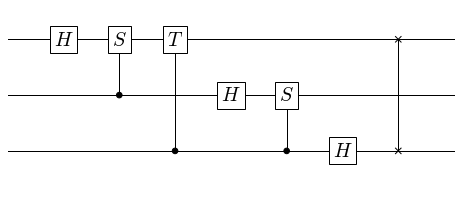

In [9]:
circuit_plot(fourier, nqubits=3);

In [ ]:
def plot_qft(n):
    circuit_plot(QFT(0,n).decompose(), nqubits=n)

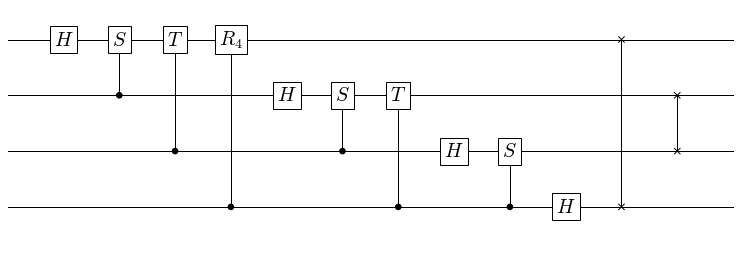

In [11]:
interact(plot_qft, n=(2,8));

The QFT circuit can be represented in various symbolic forms.

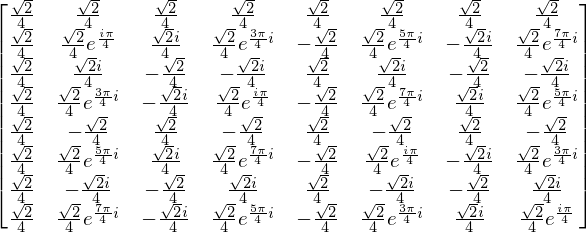

In [12]:
m = represent(QFT(0,3), nqubits=3)
m

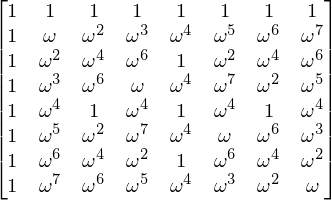

In [13]:
represent(Fourier(0,3), nqubits=3)*4/sqrt(2)

## QFT in action

Build a 3 qubit state to take the QFT of:

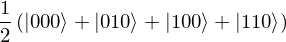

In [14]:
state = (Qubit('000') + Qubit('010') + Qubit('100') + Qubit('110'))/sqrt(4)
state

Perform the QFT:

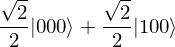

In [15]:
qapply(fourier*state)

In [17]:
def apply_qft(n):
    state = Qubit(IntQubit(n, 3))
    result = qapply(QFT(0,3).decompose()*state)
    display(state)
    display(result)

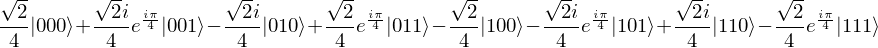

In [18]:
interact(apply_qft, n=(0,7));